<a href="https://colab.research.google.com/github/mincfranc/DD_DataScience/blob/main/Project2__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 2: PREDICTING HOUSE PRICES**

# 1 Problem Definition



*   **This project aims to identify the factors most strongly contributing to home sale prices.**


*   **The dataset spanning from 2006 to 2010 was sourced from the Assessor's office and is labeled with 81 fields containing house characgteristics and the sales prices for 2,637 cases.**

*  **The target variable is defined and contains continuous numerical data,  making this a supervised regression problem.**

#2 Data Collection/Sources



```
15 Libraries, 1 CSV file with DataFrame via URL, and 1 Data Dictionary pdf.

```

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sns
from IPython.display import IFrame

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


##*a. Set up the locations of the files containing CSV data as "df"*
*   **Data loaded from AWS S3: Housing.Data.csv**
*  **CSV file read into a Pandas DataFrame in Python**
*   **Assigned Dataframe variable: "df"**

In [51]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

df= pd.read_csv(url)

##*b. Data Dictionary Reference*

*  **Includes e-source**
*  **Lists all variable definitions: types & format**

In [52]:
from IPython.display import HTML
HTML('<iframe src="https://drive.google.com/file/d/1-KTKMgT_0mhof9rzrWZBW81InX3Ol5Hp/preview" width="640" height="480" allow="autoplay"></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


##*c. Copy DataFrame as "df1"*

*   Preserve original DataFrame when modifying copy.
*   Independent copy to compare to original df/



In [53]:
df1 = pd.DataFrame(df)

#3 Data Cleaning


##*a. Understanding the Data*

```
Summary of data structure: Dataset has 81 columns, 2,637 rows, with high null values and zero duplicates.
*Inconsistent with Data Dictionary

Target variable identified as "SalePrice", "PID" as the Identifier variable and the remaining 79 columns
are the feature variables.
```

**<font color="chartreuse">.shape</font>**

*Tuple with 81 columns and 2,637 rows in dataframe.*

In [54]:
df1.shape

(2637, 81)

**<font color="chartreuse">.head</font>**

*Preview of first 5 rows indicating presence of null values in multiple columns and rows*

In [55]:
df1.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  905101070           20        RL          62.0     14299   Pave   NaN   
1  905101330           90        RL          72.0     10791   Pave   NaN   
2  903454090           50        RM          50.0      9000   Pave   NaN   
3  533244030           60        FV          68.0      7379   Pave   NaN   
4  909252020           70        RL          60.0      7200   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN    NaN         Shed   
2       Reg          Bnk    AllPub  ...         0     NaN    NaN          NaN   
3       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       7    2007        WD           Normal     115400  
1      500      10    2006        WD           Normal      90000  
2        0      12    2007        WD           Normal     141000  
3        0       4    2010        WD           Normal     254000  
4        0       4    2009        WD           Normal     155000  

[5 rows x 81 columns]

**<font color="chartreuse">.tail</font>**

*Preview of last five rows with same null findings as with .head method*

In [56]:
df1.tail()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
2632  903231070           50        RM          52.0      6240   Pave   NaN   
2633  906201021           80        RL          74.0     10778   Pave   NaN   
2634  533253070          120        RL          61.0      3782   Pave   NaN   
2635  527376100           20        RL          78.0     10140   Pave   NaN   
2636  528292060           60        RL          41.0     12460   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
2632       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2633       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2634       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2635       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2636       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
2632         Shed      400       9    2006        WD           Normal   
2633          NaN        0       7    2009        WD           Normal   
2634          NaN        0       9    2009        WD           Normal   
2635          NaN        0       8    2009        WD           Normal   
2636          NaN        0       5    2008        WD           Normal   

      SalePrice  
2632     114500  
2633     162000  
2634     211500  
2635     165000  
2636     225000  

[5 rows x 81 columns]

## *b. TARGET Variable: "SalePrice"*

**<font color="chartreuse">.info</font>**

Summary of dataframe structure indicated there are:
*  ***Target variable "SalePrice" is integer data type***
*   11 float columns, 27 integer columns, 43 object columns
*   Columns with high amount of nulls to explore
*   and Dataset is using: 1.6+ MB** memory

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

**<font color="chartreuse">.describe and .transpose</font>**

38 numeric variables
Renamed index label '50%' to 'median'

In [58]:
describe_df = df1.describe()
describe_df.rename(index={'50%': 'median'}, inplace=True)
describe_df.transpose()

count          mean           std          min  \
PID              2637.0  7.141301e+08  1.887527e+08  526301100.0   
MS SubClass      2637.0  5.734926e+01  4.249909e+01         20.0   
Lot Frontage     2188.0  6.916682e+01  2.335678e+01         21.0   
Lot Area         2637.0  1.004469e+04  6.742550e+03       1300.0   
Overall Qual     2637.0  6.097459e+00  1.411522e+00          1.0   
Overall Cond     2637.0  5.569966e+00  1.118262e+00          1.0   
Year Built       2637.0  1.971289e+03  3.030699e+01       1872.0   
Year Remod/Add   2637.0  1.984203e+03  2.091308e+01       1950.0   
Mas Vnr Area     2614.0  1.018879e+02  1.795782e+02          0.0   
BsmtFin SF 1     2636.0  4.384412e+02  4.496023e+02          0.0   
BsmtFin SF 2     2636.0  5.106866e+01  1.725218e+02          0.0   
Bsmt Unf SF      2636.0  5.556692e+02  4.362232e+02          0.0   
Total Bsmt SF    2636.0  1.045179e+03  4.296861e+02          0.0   
1st Flr SF       2637.0  1.155506e+03  3.825975e+02        334.0   
2nd Flr SF       2637.0  3.370049e+02  4.277422e+02          0.0   
Low Qual Fin SF  2637.0  4.474403e+00  4.502251e+01          0.0   
Gr Liv Area      2637.0  1.496985e+03  4.952096e+02        334.0   
Bsmt Full Bath   2635.0  4.322581e-01  5.252392e-01          0.0   
Bsmt Half Bath   2635.0  5.882353e-02  2.401296e-01          0.0   
Full Bath        2637.0  1.559727e+00  5.501562e-01          0.0   
Half Bath        2637.0  3.852863e-01  5.036095e-01          0.0   
Bedroom AbvGr    2637.0  2.857793e+00  8.202835e-01          0.0   
Kitchen AbvGr    2637.0  1.044369e+00  2.131924e-01          0.0   
TotRms AbvGrd    2637.0  6.446720e+00  1.568342e+00          2.0   
Fireplaces       2637.0  5.991657e-01  6.510521e-01          0.0   
Garage Yr Blt    2490.0  1.978186e+03  2.545265e+01       1895.0   
Garage Cars      2636.0  1.763278e+00  7.605764e-01          0.0   
Garage Area      2636.0  4.709681e+02  2.128169e+02          0.0   
Wood Deck SF     2637.0  9.430527e+01  1.269273e+02          0.0   
Open Porch SF    2637.0  4.698445e+01  6.656433e+01          0.0   
Enclosed Porch   2637.0  2.281342e+01  6.117764e+01          0.0   
3Ssn Porch       2637.0  2.368601e+00  2.316060e+01          0.0   
Screen Porch     2637.0  1.577512e+01  5.578375e+01          0.0   
Pool Area        2637.0  2.130072e+00  3.514014e+01          0.0   
Misc Val         2637.0  4.201403e+01  3.931588e+02          0.0   
Mo Sold          2637.0  6.243838e+00  2.722093e+00          1.0   
Yr Sold          2637.0  2.007796e+03  1.306403e+00       2006.0   
SalePrice        2637.0  1.799862e+05  7.830925e+04      12789.0   

                          25%       median           75%           max  
PID              5.284770e+08  535453040.0  9.071870e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.436000e+03       9450.0  1.152600e+04  1.646600e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        368.0  7.320000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.180000e+02        464.5  7.972500e+02  2.336000e+03  
Total Bsmt SF    7.920000e+02        988.0  1.290250e+03  6.110000e+03  
1st Flr SF       8.780000e+02       1082.0  1.380000e+03  4.692000e+03  
2nd Flr SF       0.000000e+00          0.0  7.080000e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00  1.064000e+03  
Gr Liv Area      1.128000e+03       1441.0  1.740000e+03  5.642000e+03  
Bsmt Full Bath   0.000000e+00          0.0  1.00000

**<font color="chartreuse">.duplicated</font>**

*Zero duplicates in dataset*

Zero rows with duplicate values.

In [59]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2632    False
2633    False
2634    False
2635    False
2636    False
Length: 2637, dtype: bool

## *c. IDENTIFIER Variable: "PID"*

**<font color="chartreuse">.nunique</font>**


Search for unique values indicates Parcel identification number **(PID)** has as many unique values as there are rows


Will delete from df1 as it is not necessary for data analyses

In [60]:
df1.nunique()


PID               2637
MS SubClass         16
MS Zoning            7
Lot Frontage       126
Lot Area          1799
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice          983
Length: 81, dtype: int64

## *d. Columns with Missing Values Only for entire df*

*   In Descending order
*   26 Columns
*   Plan to delete columns with high missing values to control skewed distribution



In [61]:
#Get columns with missing values
columns_with_missing_values= df1.isna().sum()

missing_columns= columns_with_missing_values[columns_with_missing_values >0]
print(f"Columns with missing values=", missing_columns.count())
print(f"Total values missing from all columns=", missing_columns.sum())
print(missing_columns.sort_values(ascending=False))
print(missing_columns.dtype)



Columns with missing values= 26
Total values missing from all columns= 14208
Pool QC           2626
Misc Feature      2541
Alley             2457
Fence             2109
Mas Vnr Type      1607
Fireplace Qu      1284
Lot Frontage       449
Garage Yr Blt      147
Garage Cond        147
Garage Qual        147
Garage Finish      147
Garage Type        145
Bsmt Exposure       76
BsmtFin Type 2      74
Bsmt Qual           73
BsmtFin Type 1      73
Bsmt Cond           73
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
dtype: int64
int64


###Dropped columns with high nulls

*  'PID' not necessary for analyses
*   High null count: Pool QC, Misc Feature, Alley, Fence, Mas Vnr Type, Fireplace Qu



In [62]:
Dropped_cols_1 = df1.drop(['PID','Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 'Fireplace Qu'], axis=1, inplace=True)

In [63]:
#Confirmed Dropped_cols_1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   object 
 5   Lot Shape        2637 non-null   object 
 6   Land Contour     2637 non-null   object 
 7   Utilities        2637 non-null   object 
 8   Lot Config       2637 non-null   object 
 9   Land Slope       2637 non-null   object 
 10  Neighborhood     2637 non-null   object 
 11  Condition 1      2637 non-null   object 
 12  Condition 2      2637 non-null   object 
 13  Bldg Type        2637 non-null   object 
 14  House Style      2637 non-null   object 
 15  Overall Qual     2637 non-null   int64  
 16  Overall Cond     2637 non-null   int64  
 17  Year Built    

## *e. Identify Data Type by Columns*

#### 37 Categorical Columns & 37 Numerical Columns Identified after dropping High Null fields

In [64]:
# Identify categorical columns
categorical_columns_df1 = df1.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Categorical columns{categorical_columns_df1}')
print(len(categorical_columns_df1))

# Identify numerical columns
numerical_columns_df1 = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'\nNumerical columns{numerical_columns_df1}')
print(len(numerical_columns_df1))

Categorical columns['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']
37

Numerical columns['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Are

Identify Subcategories and Value Counts in Categorical Columns

In [65]:
print(f"Number of categorical columns= {len(categorical_columns_df1)}")
print()

total_nulls=0 #initialize

for col in categorical_columns_df1:
    subcategories = df1[col].nunique()

    string= subcategories
    print(f"\x1B[33m{col}= {string}\x1B[0m")
    print(f"Subcategory    Count")
    nulls=0

    # Get value counts and format the output
    total_sub_count =0 #Initialize
    for category, count in df1[col].value_counts().items():
        total_sub_count += count
        nulls= df1[col].isnull().sum()
        print(f"{category:<10}     {count}")  # Adjust the width (10) as needed
    string2= "Total values="
    print(f"\x1B[32m{string2} {total_sub_count: >5}\x1B[")
    string3= "Nulls="
    print(f"\x1B[36m{string3}{nulls}\x1B[")

    total_nulls+= nulls
    print()

print(f"Total Nulls= {total_nulls}")

Number of categorical columns= 37

MS Zoning= 7
Subcategory    Count
RL             2043
RM             419
FV             123
C (all)        25
RH             23
I (all)        2
A (agr)        2
Total values=  2637[
Nulls=0[

Street= 2
Subcategory    Count
Pave           2625
Grvl           12
Total values=  2637[
Nulls=0[

Lot Shape= 4
Subcategory    Count
Reg            1662
IR1            895
IR2            65
IR3            15
Total values=  2637[
Nulls=0[

Land Contour= 4
Subcategory    Count
Lvl            2365
HLS            111
Bnk            106
Low            55
Total values=  2637[
Nulls=0[

Utilities= 3
Subcategory    Count
AllPub         2634
NoSewr         2
NoSeWa         1
Total values=  2637[
Nulls=0[

Lot Config= 5
Subcategory    Count
Inside         1924
Corner         459
CulDSac        160
FR2            81
FR3            13
Total values=  2637[
Nulls=0[

Land Slope= 3
Subcategory    Count
Gtl            2511
Mod            112
Sev            14
Total

11 Float Columns Identified

In [66]:
#Define a Python list of float columns
float_columns_df1 = df1.select_dtypes(include=['float64']).columns.tolist()

print(len(float_columns_df1))
df_float= df1[float_columns_df1]

df_floats= df_float.copy()

(df_floats.describe().transpose())

11


count         mean         std     min      25%     50%  \
Lot Frontage    2188.0    69.166819   23.356779    21.0    58.00    68.0   
Mas Vnr Area    2614.0   101.887911  179.578232     0.0     0.00     0.0   
BsmtFin SF 1    2636.0   438.441199  449.602326     0.0     0.00   368.0   
BsmtFin SF 2    2636.0    51.068665  172.521803     0.0     0.00     0.0   
Bsmt Unf SF     2636.0   555.669196  436.223188     0.0   218.00   464.5   
Total Bsmt SF   2636.0  1045.179059  429.686089     0.0   792.00   988.0   
Bsmt Full Bath  2635.0     0.432258    0.525239     0.0     0.00     0.0   
Bsmt Half Bath  2635.0     0.058824    0.240130     0.0     0.00     0.0   
Garage Yr Blt   2490.0  1978.185944   25.452647  1895.0  1961.00  1979.0   
Garage Cars     2636.0     1.763278    0.760576     0.0     1.00     2.0   
Garage Area     2636.0   470.968134  212.816905     0.0   324.75   480.0   

                    75%     max  
Lot Frontage      80.00   313.0  
Mas Vnr Area     164.00  1600.0  
BsmtFin SF 1     732.00  5644.0  
BsmtFin SF 2       0.00  1526.0  
Bsmt Unf SF      797.25  2336.0  
Total Bsmt SF   1290.25  6110.0  
Bsmt Full Bath     1.00     3.0  
Bsmt Half Bath     0.00     2.0  
Garage Yr Blt   2002.00  2207.0  
Garage Cars        2.00     5.0  
Garage Area      576.00  1488.0

Lot Frontage had highest missing Float values.

In [67]:
#Get float columns with missing values
float_columns_with_missing_values= df_floats.isna().sum()

missing_float_columns= float_columns_with_missing_values[float_columns_with_missing_values >0]
print(f"Float columns with missing values=", missing_float_columns.count())
print(f"Total values missing from all float columns=", missing_float_columns.sum())
print(missing_float_columns.sort_values(ascending=False))

Float columns with missing values= 11
Total values missing from all float columns= 629
Lot Frontage      449
Garage Yr Blt     147
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
dtype: int64


### Dropped 'Lot Frontage' due to high null values

10 Float columns remain

In [68]:
# Remove 'Lot Frontage' column
df_float_1 = df_floats.drop('Lot Frontage', axis=1)

# Check for missing values
print(df_float_1.isnull().sum())
len(df_float_1.columns)

Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     147
Garage Cars         1
Garage Area         1
dtype: int64


10

27 Integer Columns Identified

In [69]:
#Define a Python list of integer columns
integer_columns_df1 = df1.select_dtypes(include=['int64']).columns.tolist()

print(len(integer_columns_df1))
df_integer= df1[integer_columns_df1]

df_integers= df_integer.copy()

(df_integers.describe())



26


MS SubClass       Lot Area  Overall Qual  Overall Cond   Year Built  \
count  2637.000000    2637.000000   2637.000000   2637.000000  2637.000000   
mean     57.349261   10044.694729      6.097459      5.569966  1971.288586   
std      42.499091    6742.549521      1.411522      1.118262    30.306986   
min      20.000000    1300.000000      1.000000      1.000000  1872.000000   
25%      20.000000    7436.000000      5.000000      5.000000  1954.000000   
50%      50.000000    9450.000000      6.000000      5.000000  1973.000000   
75%      70.000000   11526.000000      7.000000      6.000000  2001.000000   
max     190.000000  164660.000000     10.000000      9.000000  2010.000000   

       Year Remod/Add   1st Flr SF   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
count     2637.000000  2637.000000  2637.000000      2637.000000  2637.000000   
mean      1984.202882  1155.505878   337.004930         4.474403  1496.985210   
std         20.913077   382.597499   427.742219        45.022510   495.209631   
min       1950.000000   334.000000     0.000000         0.000000   334.000000   
25%       1965.000000   878.000000     0.000000         0.000000  1128.000000   
50%       1993.000000  1082.000000     0.000000         0.000000  1441.000000   
75%       2004.000000  1380.000000   708.000000         0.000000  1740.000000   
max       2010.000000  4692.000000  2065.000000      1064.000000  5642.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2637.000000    2637.000000     2637.000000  2637.000000   
mean   ...     94.305271      46.984452       22.813424     2.368601   
std    ...    126.927272      66.564333       61.177638    23.160600   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000      584.000000   407.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2637.000000  2637.000000   2637.000000  2637.000000  2637.000000   
mean      15.775123     2.130072     42.014031     6.243838  2007.795601   
std       55.783751    35.140140    393.158781     2.722093     1.306403   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  12500.000000    12.000000  2010.000000   

           SalePrice  
count    2637.000000  
mean   179986.230186  
std     78309.251522  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213000.000000  
max    745000.000000  

[8 rows x 26 columns]

No missing values in any Integer Columns

In [70]:
#Get integer columns with missing values
integer_columns_with_missing_values= df_integers.isna().sum()

missing_integers_columns= integer_columns_with_missing_values[integer_columns_with_missing_values >0]
print(f"Integers columns with missing values=", missing_integers_columns.count())
print(f"Integers values missing from all columns=", missing_integers_columns.sum())
print(missing_integers_columns.sort_values(ascending=False))

Integers columns with missing values= 0
Integers values missing from all columns= 0
Series([], dtype: int64)


#4 Exploratory Data Analysis


## *a. Calculate Marginal Probability in Categorical Variables*

The probability of an event occurring to find potential strong predictors of house prices.

---

At least 90% of all houses in dataset share similarities across 13 categorial features indicating those features are less likely to have a strong influence on price variations.

In [71]:
# Return marginal probability for categorical variables with subcategories over 90%

filtered_cats= []

for col in categorical_columns_df1:
    # Calculate marginal probabilities and filter for those over 90%
    filtered_probs = df1[col].value_counts(normalize=True) * 100
    filtered_probs1 = filtered_probs[filtered_probs > 90]

    # Sort filtered probabilities in descending order
    sorted_probs = filtered_probs1.sort_values(ascending=False)

    # Print if any subcategories meet the criteria
    if not sorted_probs.empty:
        print(f"\x1B[33m{col}:\x1B[0m")  # Print column name
        for index, value in sorted_probs.items():
            print(f"{index}: {value:.1f}%")  # Print subcategory and value
        print()  # Add a newline

    if not filtered_probs1.empty:
        filtered_cats.append(col)

print(filtered_cats)
print(len(filtered_cats))

Street:
Pave: 99.5%

Utilities:
AllPub: 99.9%

Land Slope:
Gtl: 95.2%

Condition 2:
Norm: 98.9%

Roof Matl:
CompShg: 98.6%

Bsmt Cond:
TA: 92.0%

Heating:
GasA: 98.5%

Central Air:
Y: 93.3%

Electrical:
SBrkr: 91.5%

Functional:
Typ: 93.0%

Garage Qual:
TA: 94.6%

Garage Cond:
TA: 96.4%

Paved Drive:
Y: 90.8%

['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Bsmt Cond', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive']
13


In [72]:
# Create list of 13 additional categorical columns to be removed after marginal prob findings
Dropped_cols_2 = filtered_cats

# Remove duplicates from the list to avoid potential errors
Dropped_cols_2 = list(dict.fromkeys(Dropped_cols_2))

# Drop the columns
df1 = df1.drop(columns=Dropped_cols_2, errors='ignore')  # errors='ignore' to prevent KeyError if a column doesn't exist

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Lot Shape        2637 non-null   object 
 5   Land Contour     2637 non-null   object 
 6   Lot Config       2637 non-null   object 
 7   Neighborhood     2637 non-null   object 
 8   Condition 1      2637 non-null   object 
 9   Bldg Type        2637 non-null   object 
 10  House Style      2637 non-null   object 
 11  Overall Qual     2637 non-null   int64  
 12  Overall Cond     2637 non-null   int64  
 13  Year Built       2637 non-null   int64  
 14  Year Remod/Add   2637 non-null   int64  
 15  Roof Style       2637 non-null   object 
 16  Exterior 1st     2637 non-null   object 
 17  Exterior 2nd  

## *b. Understanding distribution and characteristics of categorical variables*

### Find Unique Subcategories in Categorical Columns

Mitigate challenges of high-cardinality categorical features to fit regression as machine learning model requires numerical input.

*   Find large number of unique categories in categorical columns.
*   One-hot encoded to transform unique category to binary feature, and target imputation to replace categories with avg target value for corresponding category.

In [73]:
# Initiate loop to iterate through each categorical column in list: 'categorical_columns_df1'

high_unique_cats= []


for col in categorical_columns_df1:

  if col in df1.columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(df1[col].unique())}")
    print(f"Most common values:")
    print(df1[col].value_counts(normalize=True).head()) #calculate frequency of each category in column

    # Check if the column has too many unique values
    if len(df1[col]) > 50:
        print(f"Warning: {col} has more than 50 unique values")

    # Check if the column is highly imbalanced
    if df1[col].value_counts(normalize=True).max() > 0.95:
        print(f"Warning: {col} is highly imbalanced")

    if not df1[col].empty:
      high_unique_cats.append(col)

print(len(high_unique_cats))  #24 total categorical columns with high cardinality


Column: MS Zoning
Number of unique values: 7
Most common values:
MS Zoning
RL         0.774744
RM         0.158893
FV         0.046644
C (all)    0.009480
RH         0.008722
Name: proportion, dtype: float64

Column: Lot Shape
Number of unique values: 4
Most common values:
Lot Shape
Reg    0.630262
IR1    0.339401
IR2    0.024649
IR3    0.005688
Name: proportion, dtype: float64

Column: Land Contour
Number of unique values: 4
Most common values:
Land Contour
Lvl    0.896852
HLS    0.042093
Bnk    0.040197
Low    0.020857
Name: proportion, dtype: float64

Column: Lot Config
Number of unique values: 5
Most common values:
Lot Config
Inside     0.729617
Corner     0.174061
CulDSac    0.060675
FR2        0.030717
FR3        0.004930
Name: proportion, dtype: float64

Column: Neighborhood
Number of unique values: 28
Most common values:
Neighborhood
NAmes      0.150550
CollgCr    0.091013
OldTown    0.082670
Edwards    0.063709
Somerst    0.061054
Name: proportion, dtype: float64

Column: Con

### One-hot encode 24 Categorical columns with high ordinality

In [74]:
#Create copy of dataframe to test
encoded_cats= df1.copy()

encoded_cats= pd.get_dummies(encoded_cats, columns=high_unique_cats, prefix=high_unique_cats, drop_first=True)

# Now encoded_cats contains the one-hot encoded columns

# Print the info of the encoded DataFrame
encoded_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Columns: 192 entries, MS SubClass to Sale Condition_Partial
dtypes: bool(155), float64(11), int64(26)
memory usage: 1.1 MB


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Lot Shape        2637 non-null   object 
 5   Land Contour     2637 non-null   object 
 6   Lot Config       2637 non-null   object 
 7   Neighborhood     2637 non-null   object 
 8   Condition 1      2637 non-null   object 
 9   Bldg Type        2637 non-null   object 
 10  House Style      2637 non-null   object 
 11  Overall Qual     2637 non-null   int64  
 12  Overall Cond     2637 non-null   int64  
 13  Year Built       2637 non-null   int64  
 14  Year Remod/Add   2637 non-null   int64  
 15  Roof Style       2637 non-null   object 
 16  Exterior 1st     2637 non-null   object 
 17  Exterior 2nd  

##*c. Data Visualization*

###Histogram to visualize distribution of variables and their relationship with 'SalePrice'.

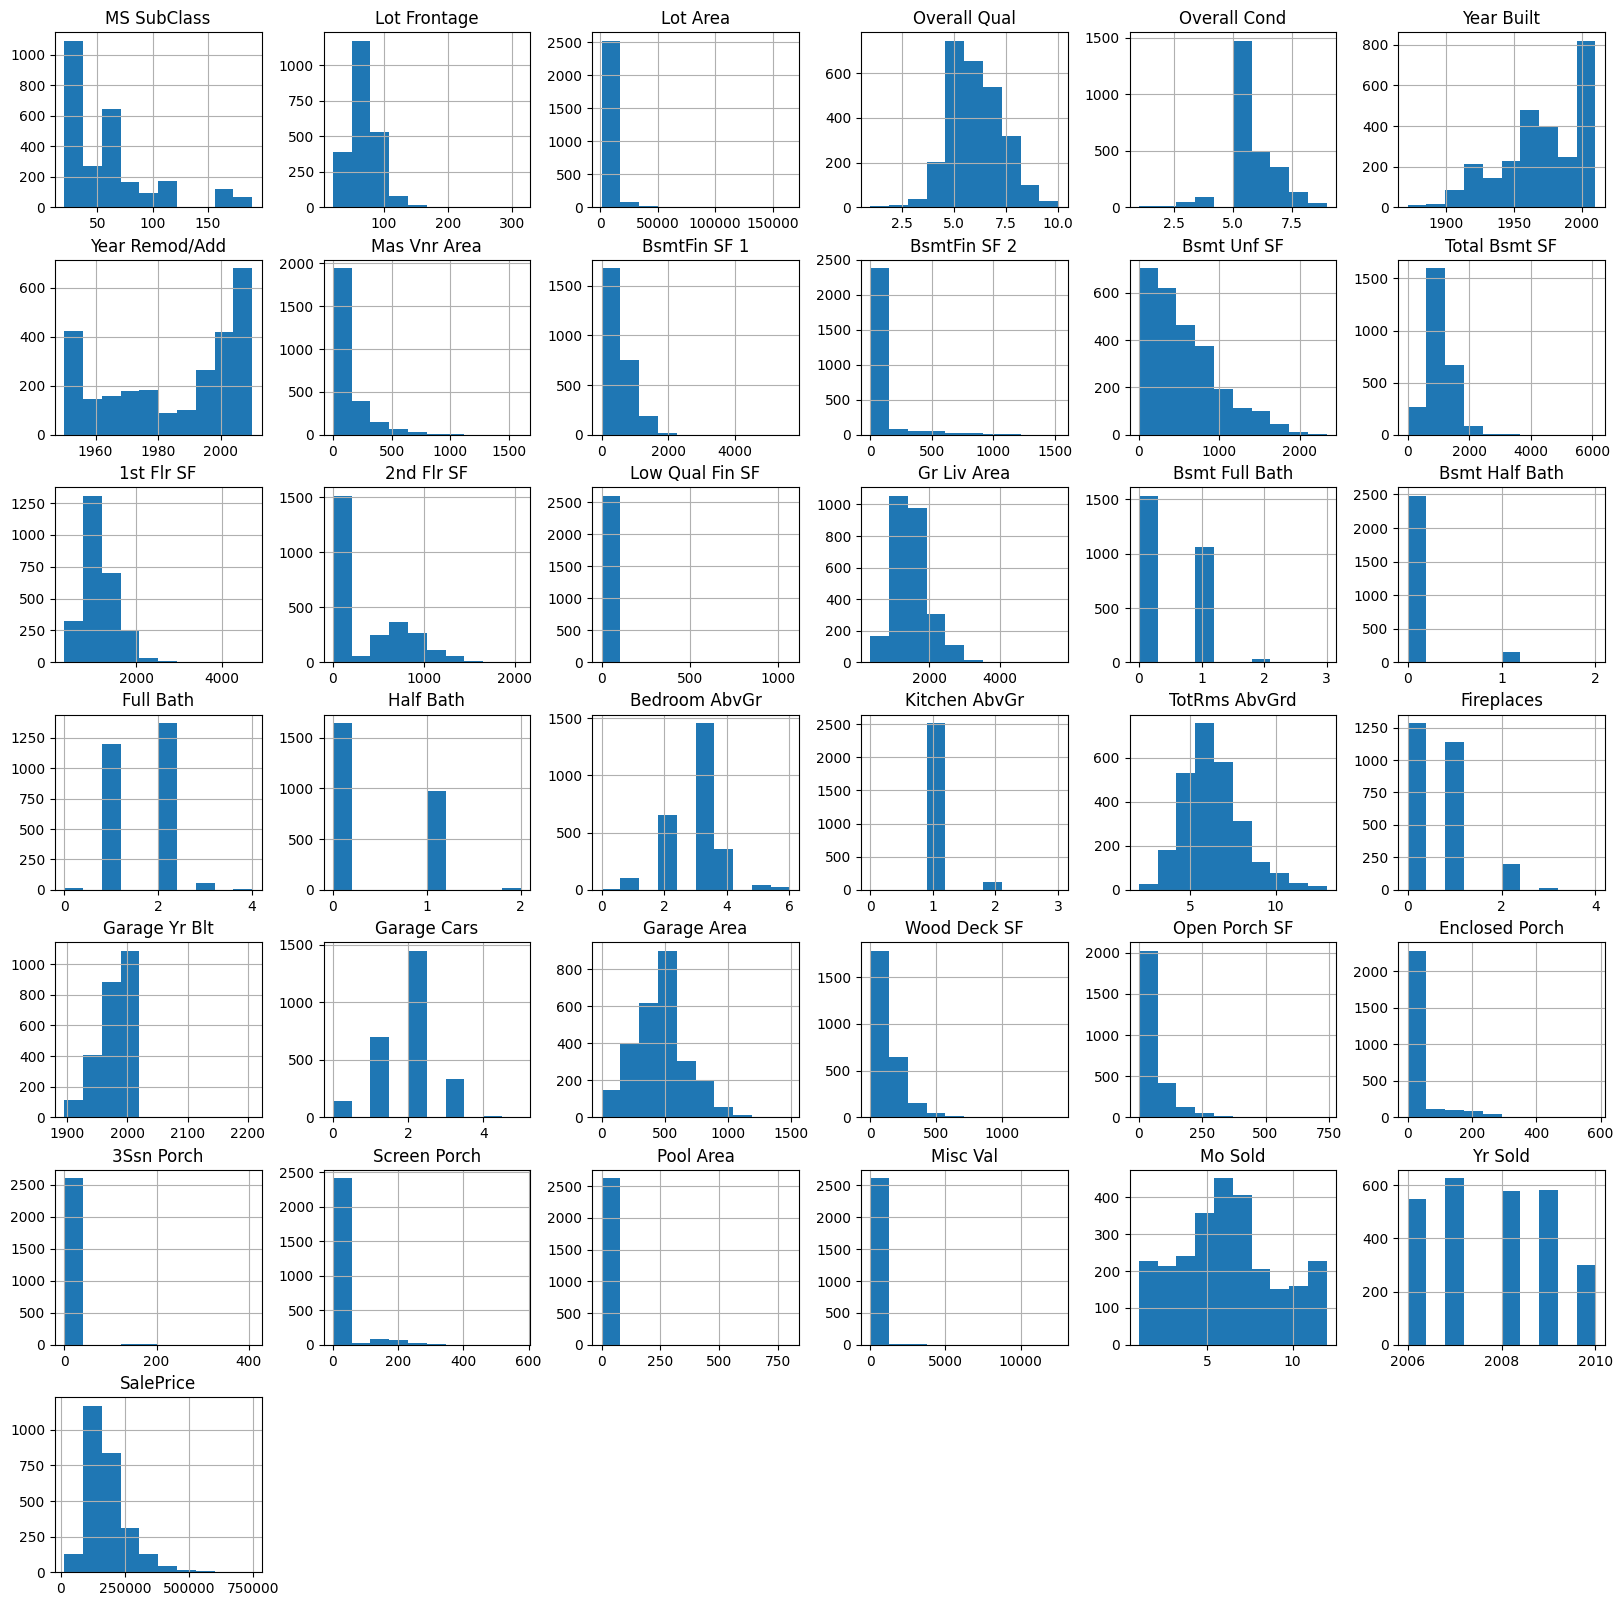

In [76]:
df1.hist(figsize=(20, 20))
plt.show()

###Line plots to track the trend of 'SalePrice' over time based on 'Year Built'

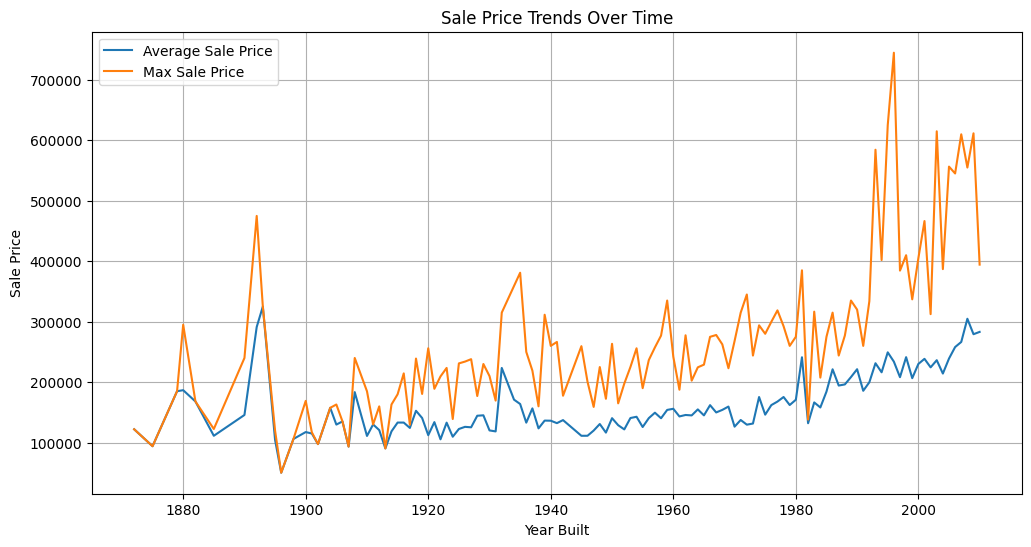

In [77]:
import matplotlib.pyplot as plt

# Calculate average and maximum sale price by year
average_sale_price_by_year = df1.groupby('Year Built')['SalePrice'].mean()
max_sale_price_by_year = df1.groupby('Year Built')['SalePrice'].max()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot average sale price
plt.plot(average_sale_price_by_year.index, average_sale_price_by_year.values, label='Average Sale Price')

# Plot max sale price
plt.plot(max_sale_price_by_year.index, max_sale_price_by_year.values, label='Max Sale Price')

# Customize the plot
plt.title('Sale Price Trends Over Time')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the lines

plt.show()

In [78]:
df1['SalePrice'].describe()

count      2637.000000
mean     179986.230186
std       78309.251522
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213000.000000
max      745000.000000
Name: SalePrice, dtype: float64

###Scatter plots to illustrate the relationships between 'SalePrice' and key variables like "Overall Qual" and "Gr Liv Area".

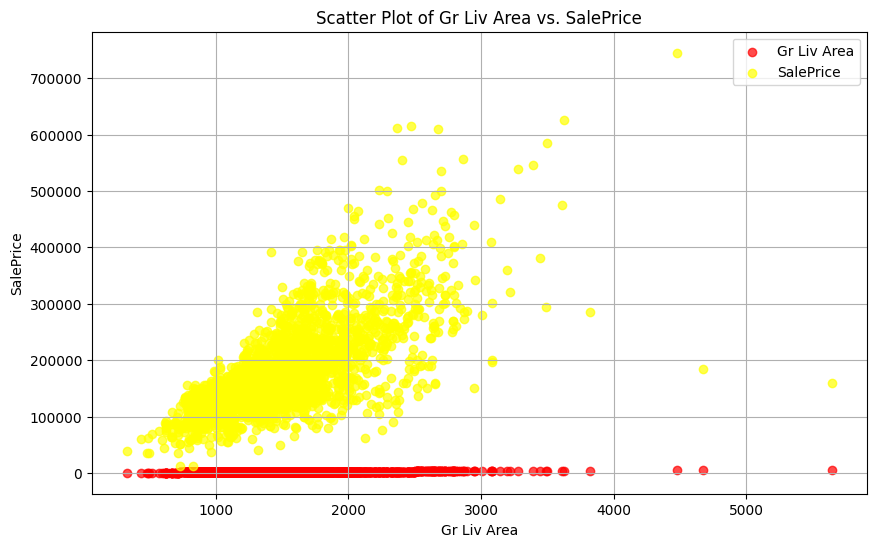

In [79]:
plt.figure(figsize=(10, 6))

# Plot 'Gr Liv Area' dots in red
plt.scatter(df1['Gr Liv Area'], df1['Gr Liv Area'], color='red', alpha=0.7, label='Gr Liv Area')

# Plot 'SalePrice' dots in yellow
plt.scatter(df1['Gr Liv Area'], df1['SalePrice'], color='yellow', alpha=0.7, label='SalePrice')

# Customize the plot
plt.title('Scatter Plot of Gr Liv Area vs. SalePrice')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


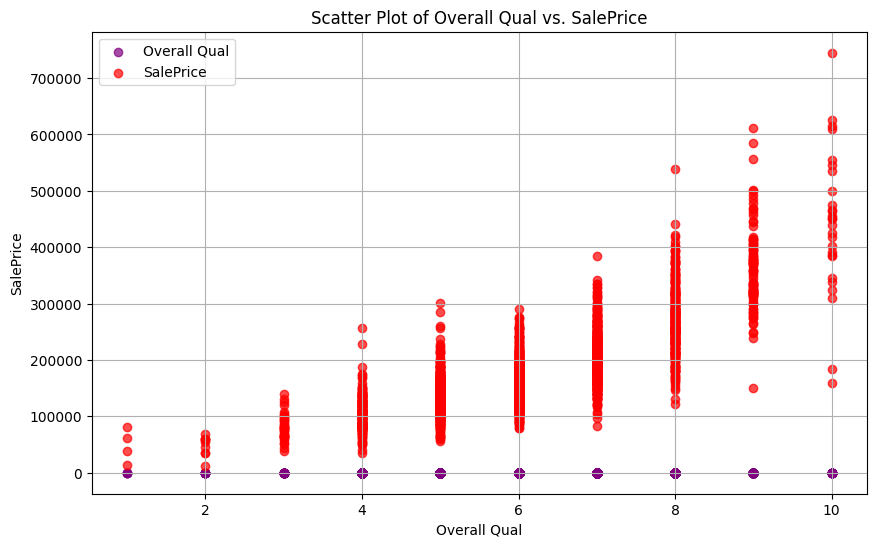

In [80]:
plt.figure(figsize=(10, 6))

# Plot 'Overall Qual' dots in purple
plt.scatter(df1['Overall Qual'], df1['Overall Qual'], color='purple', alpha=0.7, label='Overall Qual')

# Plot 'SalePrice' dots in red
plt.scatter(df1['Overall Qual'], df1['SalePrice'], color='red', alpha=0.7, label='SalePrice')

# Customize the plot
plt.title('Scatter Plot of Overall Qual vs. SalePrice')
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


#5 Processing


## *a. Feature Selection*

In [81]:
#Correlation between categorical variables and target using temp variable encoded_cats= one-hot encoded categorical variables for nulls
rs = np.random.RandomState(0)
corr = encoded_cats.corr()
corr.style.background_gradient(cmap= 'tab10')

In [82]:
encoded_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Columns: 192 entries, MS SubClass to Sale Condition_Partial
dtypes: bool(155), float64(11), int64(26)
memory usage: 1.1 MB


### Overall Quality & Gr Living Area had highest correlation to SalePrice

In [83]:
rs = np.random.RandomState(0)
corr = encoded_cats.corr()

# Filter to get correlations with 'sale_price' and apply conditions
sale_price_corr = corr['SalePrice']
filtered_sale_price_corr = sale_price_corr[(sale_price_corr >= 0.7) | (sale_price_corr <= -0.7)]

# Convert to a DataFrame for better styling
filtered_sale_price_corr_df = filtered_sale_price_corr.to_frame(name='Correlation')

# Display the filtered correlation
filtered_sale_price_corr_df.style.background_gradient(cmap='tab10')

In [84]:
#correlation between floats and target

rs = np.random.RandomState(0)
corr = df_floats.corr()
corr.style.background_gradient(cmap= 'viridis')
#highest correlation between sales price and overall quality =0.80, sales price x greater living area 0.70

##*b. Mean Imputation of Floats*

Impute missing data in float columns by replacing them with the average value of their respective columns to processfor model training.

In [85]:
# Replace missing values with the mean of each column
for col in df_float_1.columns:
    df_float_1[col] = df_float_1[col].fillna(df_float_1[col].mean())

# Verify that there are no more missing values/nulls
print(df_float_1.isnull().sum())

Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
dtype: int64


#6 Regression Predicting Techniques to Minimize RMS percentage error

##*a. Ridge Regression*

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import numpy as np

# Assuming 'df1' is your DataFrame
X = df1[['Overall Qual', 'Gr Liv Area']]
y = df1['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regularization with Ridge Regression
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Calculate RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

rmspe_score = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_score}")

print(rmspe_score*100)  #average percentage error in my predictions using these variables

RMSPE: 0.26618779275985605
26.618779275985606


##*b. Linear Regression*

In [90]:
X = df1[['Overall Qual', 'Gr Liv Area']]
y = df1['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Model Training (Linear Regression)
linear_reg = LinearRegression()  # Create a LinearRegression object
linear_reg.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = ridge.predict(X_test)

# Calculate RMSPE
def rmspe1(y_true, y_pred):
    """

    Args:
      y_true:
      y_pred:

    Returns:

    """
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

rmspe_score = rmspe1(y_test, y_pred)
print(f"RMSPE: {rmspe_score}")

print(rmspe_score*100)  #average percentage error in my predictions using these variables

RMSPE: 0.26618779275985605
26.618779275985606


In [88]:
import pickle



# Save the trained model and scaler
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Function for making predictions
def predict_house_price(overall_qual, gr_liv_area):
    """Predicts house price based on overall quality and living area."""

    # Load the model and scaler
    with open('house_price_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    # Create input data
    input_data = [[overall_qual, gr_liv_area]]

    # Scale the input data
    scaled_input = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(scaled_input)[0]

    return prediction

# Example usage
overall_qual_input = 8  # Replace with user input
gr_liv_area_input = 1800  # Replace with user input

predicted_price = predict_house_price(overall_qual_input, gr_liv_area_input)
print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $260218.91


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Per RMSPE score 26%, the chosen prediciton variables 'Overall Qual' and 'Gr Liv Area', likely contributed to a reasonably accurate prediction of house prices.

However, there's still potential for improvement by exploring additional features and model refinements.

#7 Data Visualization/Communication of Results


On average, my model's predictions using 'Overall Qual' and 'Gr Liv Area' are off by about 26% from the actual house prices.

RMSPE: 0.2662
RMSPE: 0.2662 (logged at 2024-10-22 05:29:56.205768)


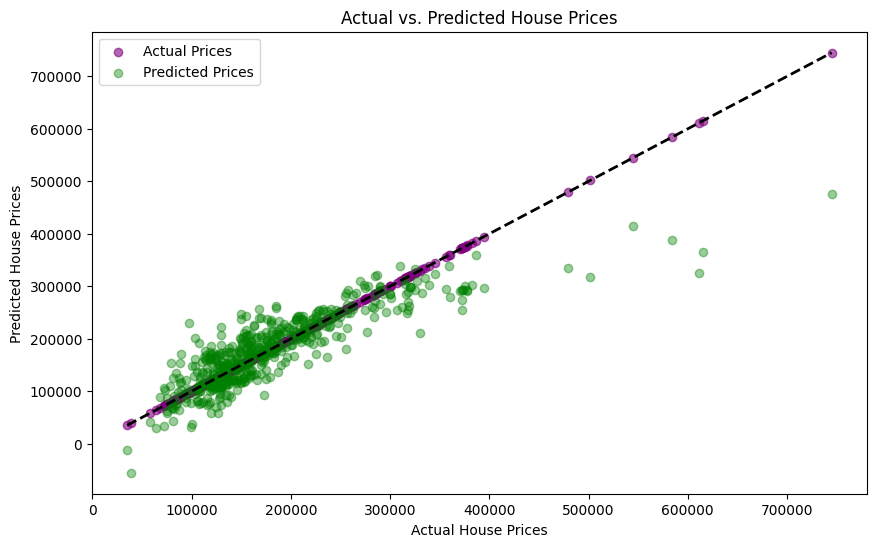


Interpretation of the Scatterplot:
 - Points close to the 45-degree line indicate good predictions.
 - Points far from the line represent larger prediction errors.
 - Overall pattern shows the relationship between actual and predicted prices.
 - The scatterplot shows a generally positive linear relationship,
   indicating that as actual house prices increase, the predicted
   house prices also tend to increase.


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

# 1. Prepare Data
X = df1[['Overall Qual', 'Gr Liv Area']]
y = df1['SalePrice']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training (Ridge Regression)
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# 5. Save the trained model and scaler
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# 6. Function for Making Predictions
def predict_house_price2(overall_qual, gr_liv_area):
    """Predicts house price based on overall quality and living area."""
    with open('house_price_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)
    input_data = [[overall_qual, gr_liv_area]]
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)[0]
    return prediction

# 7. Function to calculate RMSPE
def rmspe2(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

# Function to monitor and log performance
def monitor_performance(actual_prices, predicted_prices):
    """Calculates and logs RMSPE, and stores predictions with timestamps."""
    rmspe_score = rmspe(actual_prices, predicted_prices)
    # Create a log entry with timestamp
    log_entry = {
        'timestamp': datetime.now(),
        'rmspe': rmspe_score,
        'actual_prices': actual_prices.tolist(),  # Convert to list for JSON serialization
        'predicted_prices': predicted_prices.tolist()
    }
    # Append the log entry to a file or database (example: using a CSV file)
    log_df = pd.DataFrame([log_entry])
    log_df.to_csv('performance_log.csv', mode='a', header=False, index=False)
    print(f"RMSPE: {rmspe_score:.4f} (logged at {log_entry['timestamp']})")

# 8. Data Visualization/Communication of Results
def visualize_predictions2(y_true, y_pred):
    """Visualizes actual vs. predicted house prices."""
    plt.figure(figsize=(10, 6))

    # Plot actual prices in purple
    plt.scatter(y_true, y_true, color='purple', alpha=0.6, label='Actual Prices')

    # Plot predicted prices in green
    plt.scatter(y_true, y_pred, color='green', alpha=0.4, label='Predicted Prices')

    plt.xlabel("Actual House Prices")
    plt.ylabel("Predicted House Prices")
    plt.title("Actual vs. Predicted House Prices using Ridge Regression")

    # Add a 45-degree line for reference
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)

    # Add legend
    plt.legend()

    plt.show()

# Interpretation comment
    print("\nInterpretation of the Scatterplot:")
    print(" - Points close to the 45-degree line indicate good predictions.")
    print(" - Points far from the line represent larger prediction errors.")
    print(" - Overall pattern shows the relationship between actual and predicted prices.")

# Specific interpretation of the relationship (assuming a positive linear trend)
    print(" - The scatterplot shows a generally positive linear relationship,")
    print("   indicating that as actual house prices increase, the predicted")
    print("   house prices also tend to increase.")



# Example Usage:
# - Make predictions on the test set (since we are using df1 directly)
y_pred = ridge.predict(X_test)

# - Calculate and print RMSPE
rmspe_score = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_score:.4f}")

# - Monitor performance (using test set for demonstration)
monitor_performance(y_test, y_pred)

# - Visualize predictions
visualize_predictions2(y_test, y_pred)

RMSPE: 0.2662
RMSPE: 0.2662 (logged at 2024-10-22 05:34:35.484714)


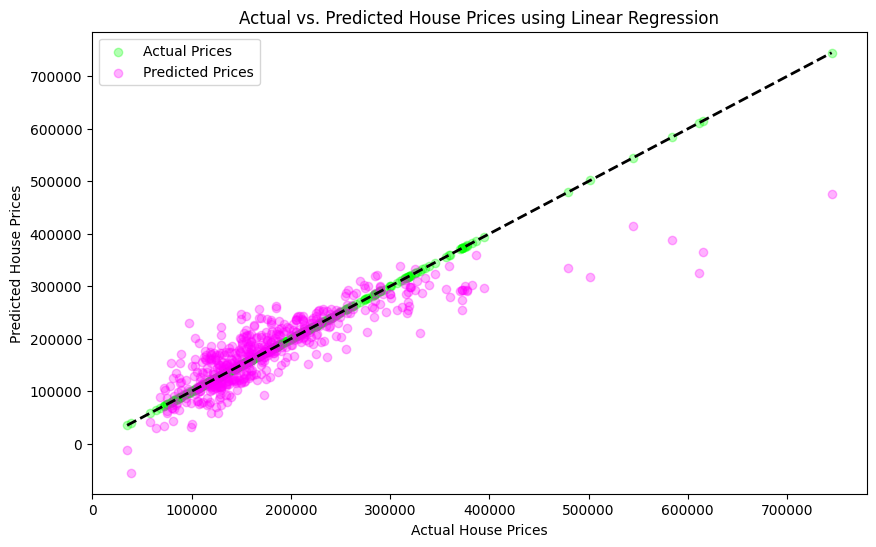


Interpretation of the Scatterplot:
 - Points close to the 45-degree line indicate good predictions.
 - Points far from the line represent larger prediction errors.
 - Overall pattern shows the relationship between actual and predicted prices.
 - The scatterplot shows a generally positive linear relationship,
   indicating that as actual house prices increase, the predicted
   house prices also tend to increase.


In [93]:
# 1. Prepare Data
X = df1[['Overall Qual', 'Gr Liv Area']]
y = df1['SalePrice']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training (Linear Regression)
linear_reg = LinearRegression()  # Create a LinearRegression object
linear_reg.fit(X_train, y_train)  # Train the model

# 5. Save the trained model and scaler
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# 6. Function for Making Predictions
def predict_house_price3(overall_qual, gr_liv_area):
    """Predicts house price based on overall quality and living area."""
    with open('house_price_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)
    input_data = [[overall_qual, gr_liv_area]]
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)[0]
    return prediction

# 7. Function to calculate RMSPE
def rmspe3(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

# Function to monitor and log performance
def monitor_performance3(actual_prices, predicted_prices):
    """Calculates and logs RMSPE, and stores predictions with timestamps."""
    rmspe_score = rmspe1(actual_prices, predicted_prices)
    # Create a log entry with timestamp
    log_entry = {
        'timestamp': datetime.now(),
        'rmspe': rmspe_score,
        'actual_prices': actual_prices.tolist(),  # Convert to list for JSON serialization
        'predicted_prices': predicted_prices.tolist()
    }
    # Append the log entry to a file or database (example: using a CSV file)
    log_df = pd.DataFrame([log_entry])
    log_df.to_csv('performance_log.csv', mode='a', header=False, index=False)
    print(f"RMSPE: {rmspe_score:.4f} (logged at {log_entry['timestamp']})")

# 8. Data Visualization/Communication of Results
def visualize_predictions3(y_true, y_pred):
    """Visualizes actual vs. predicted house prices."""
    plt.figure(figsize=(10, 6))

    # Plot actual prices in lime
    plt.scatter(y_true, y_true, color='lime', alpha=0.3, label='Actual Prices')

    # Plot predicted prices in magenta
    plt.scatter(y_true, y_pred, color='magenta', alpha=0.3, label='Predicted Prices')

    plt.xlabel("Actual House Prices")
    plt.ylabel("Predicted House Prices")
    plt.title("Actual vs. Predicted House Prices using Linear Regression")

    # Add a 45-degree line for reference
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)

    # Add legend
    plt.legend()

    plt.show()

# Interpretation comment
    print("\nInterpretation of the Scatterplot:")
    print(" - Points close to the 45-degree line indicate good predictions.")
    print(" - Points far from the line represent larger prediction errors.")
    print(" - Overall pattern shows the relationship between actual and predicted prices.")

# Specific interpretation of the relationship (assuming a positive linear trend)
    print(" - The scatterplot shows a generally positive linear relationship,")
    print("   indicating that as actual house prices increase, the predicted")
    print("   house prices also tend to increase.")



# Example Usage:
# - Make predictions on the test set (since we are using df1 directly)
y_pred = ridge.predict(X_test)

# - Calculate and print RMSPE
rmspe_score = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_score:.4f}")

# - Monitor performance (using test set for demonstration)
monitor_performance3(y_test, y_pred)

# - Visualize predictions
visualize_predictions3(y_test, y_pred)